In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

**1. Read the dataset and examine how many features and examples does it have? (Hint: you can use Pandas to load the dataset into a dataframe)**

In [32]:
file_path = 'cars.csv'

In [33]:
df = pd.read_csv(file_path)
num_features = df.shape[1]
num_examples = df.shape[0]

print(f"\nNumber of features: {num_features}")
print(f"Number of examples: {num_examples}")


Number of features: 8
Number of examples: 398


The DataFrame.shape returns a tuple representing the dimensionality of the DataFrame.

**2. Are there features with missing values? How many missing values are there in each one? (Hint: you can use isnull() from Pandas)**

In [34]:
missing_values = df.isnull().sum()

columns_with_missing_values = missing_values[missing_values > 0]

if not columns_with_missing_values.empty:
    print(f"\nTotal number of missing values is: {columns_with_missing_values.sum()}")
    print("\nFeatures with missing values and the number of missing values in each:")
    for column, num_missing in columns_with_missing_values.items():
        print(f"{column}: {num_missing}")
else:
    print("\nNo missing values found in any column.")



Total number of missing values is: 8

Features with missing values and the number of missing values in each:
horsepower: 6
origin: 2


We found the columns that have missing values, which turned out to be the horsepower (6) and the origin (2) columns, in total of 8 missing values.

**3. Fill the missing values in each feature using a proper imputation method (for example: fill with mean, median, or mode)**

In [35]:
if not columns_with_missing_values.empty:
    print("\nHere is the filling for each column that has empty values:")
    for column in columns_with_missing_values.index:
        if df[column].dtype == 'object':
            mode_value = df[column].mode()[0]
            print(f"The mode value for {column} is: {mode_value}")
            df[column].fillna(mode_value, inplace=True)
        else:
            median_value = df[column].median()
            print(f"The median value for {column} is: {median_value}")
            df[column].fillna(median_value, inplace=True)
else:
    print("\nNo missing values found in any column.")


Here is the filling for each column that has empty values:
The median value for horsepower is: 93.5
The mode value for origin is: USA


After finding the columns with empty values, we filled them with the median (if the column contains numerical values) or the mode (if the column contains strings).

**4. Which country produces cars with better fuel economy? (Hint: use box plot that shows the mpg for each country (all countries in one plot))**

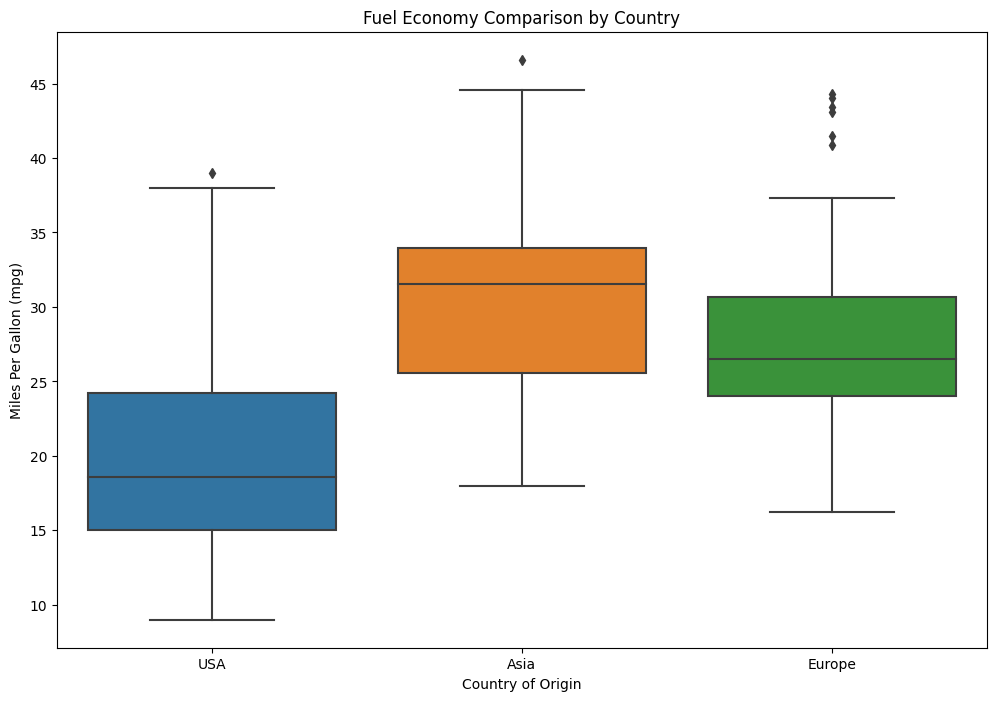

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('Fuel Economy Comparison by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Miles Per Gallon (mpg)')
plt.show()

The above box plot shows the min and max mpg for each country, and in the colored area we see a horizontal line in each box, indicating the median. From that, we can see that the best fuel economy is in Asia.

**5. Which of the following features has a distribution that is most similar to a Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’? Answer this part by showing the histogram of each feature.**

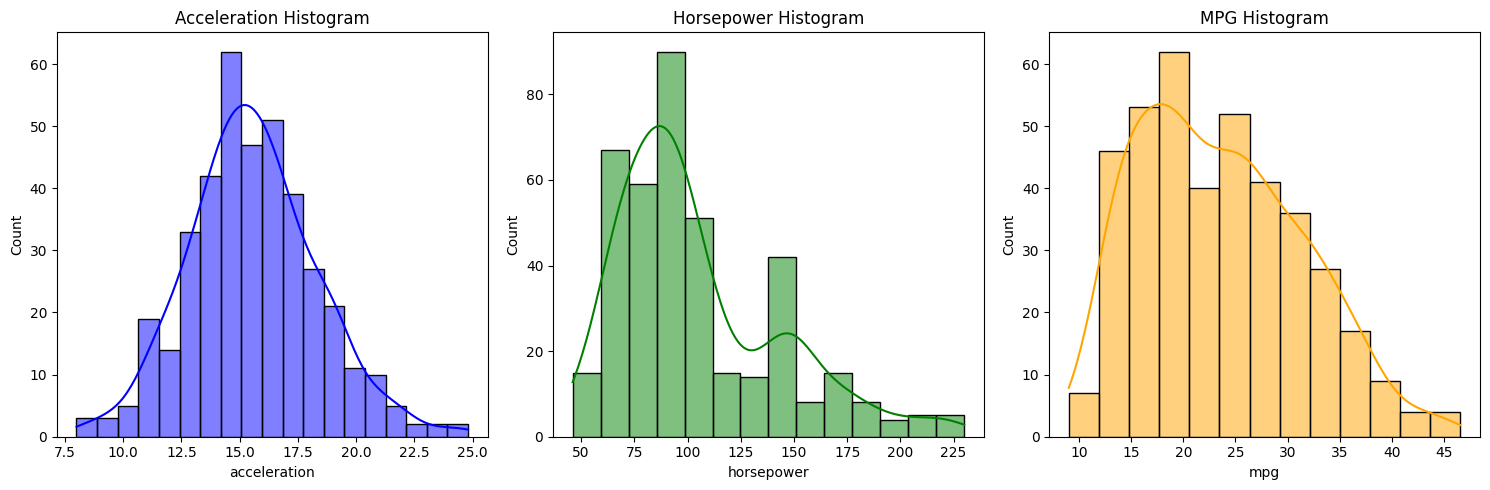

In [37]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['acceleration'], kde=True, color='blue')
plt.title('Acceleration Histogram')

plt.subplot(1, 3, 2)
sns.histplot(df['horsepower'], kde=True, color='green')
plt.title('Horsepower Histogram')

plt.subplot(1, 3, 3)
sns.histplot(df['mpg'], kde=True, color='orange')
plt.title('MPG Histogram')

plt.tight_layout()
plt.show()


From the above three graphs, we can see that the acceleration is the feature that is the most similar to the gaussian distribution.

**6. Support your answer for part 5 by using a quantitative measure.**

<ipython-input-38-2bd18459c3ba>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Skewness = df.skew()


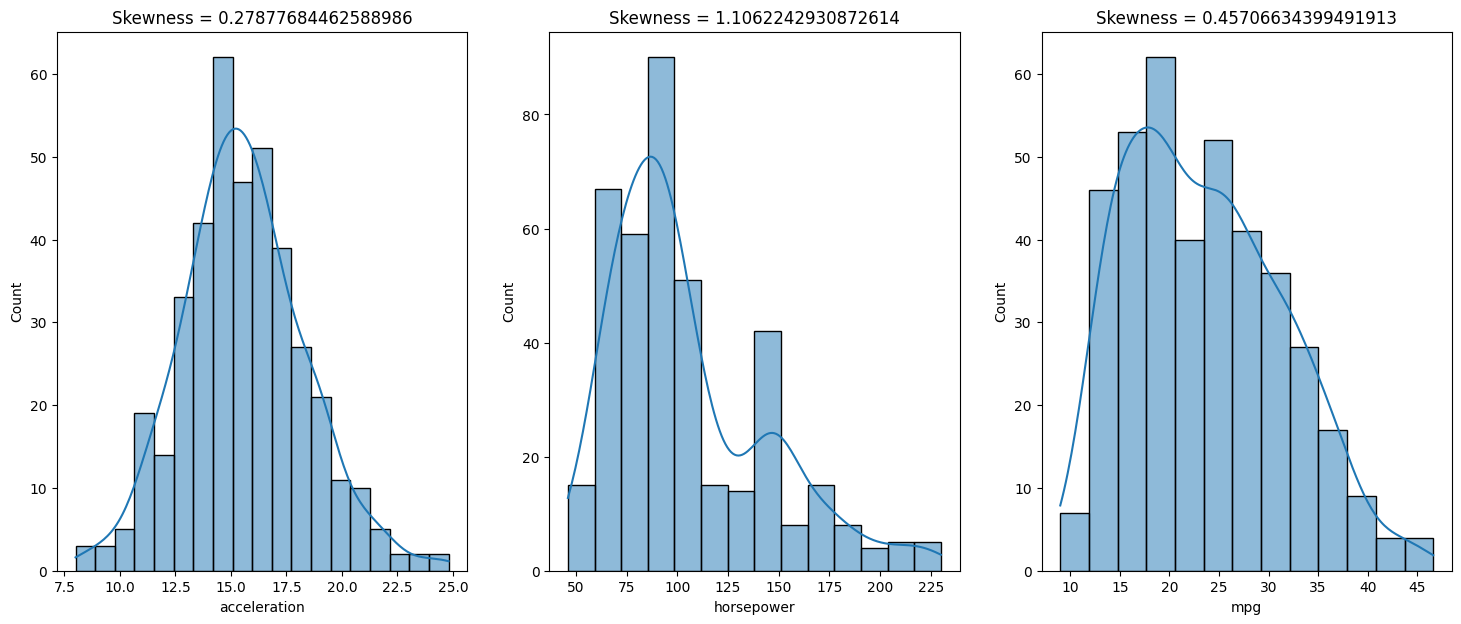

In [38]:
features = ['acceleration', 'horsepower', 'mpg']
Skewness = df.skew()
fig, axs = plt.subplots(figsize=(18, 7), ncols=3)
v = [5, 3, 0] # index of each column
j = 0

for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, kde=True, ax=axs[i])
    axs[i].set_title(f"Skewness = {Skewness[v[j]]}")
    j = j + 1


By calculating the skewness for each feature, which estimates or measures the shape of a distribution.

*   Skewness = 0: Then normally distributed.
*   Skewness > 0: Then more weight in the left tail of the distribution.
*   Skewness < 0: Then more weight in the right tail of the distribution.

From the above, we can see that the results match the eye-estimation in part 5.

**7. Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis. Is there a correlation between them? Positive or negative?**

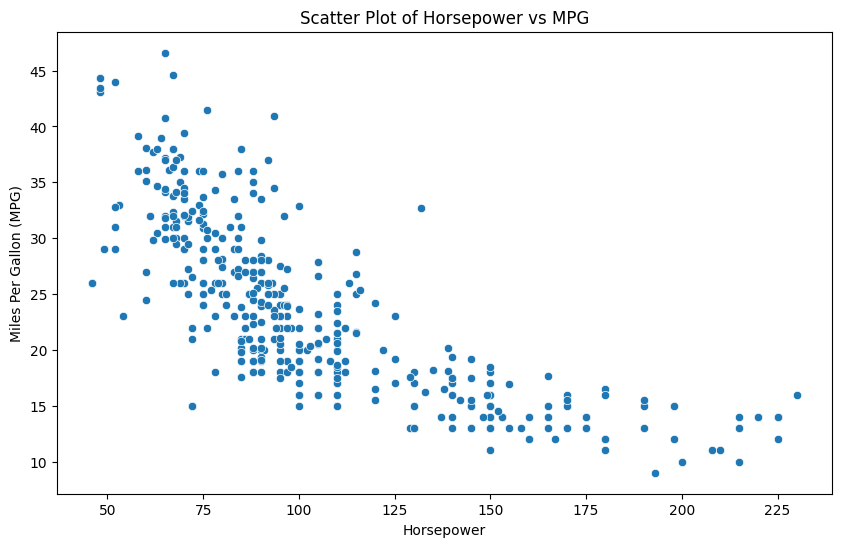

Correlation coefficient between 'horsepower' and 'mpg': -0.7734532045742156


In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot of Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

correlation_coefficient = df['horsepower'].corr(df['mpg'])
print(f"Correlation coefficient between 'horsepower' and 'mpg': {correlation_coefficient}")

The correlation coefficient is -0.7734532045742156, they have negative correlation, which means that as horsepower increases, mpg tends to decrease, which can be seen from the graph.

**8. Implement the closed form solution of linear regression and use it to learn a linear model to predict the ‘mpg’ from the ‘horsepower’. Plot the learned line on the same scatter plot you got in part 7. (Hint: This is a simple linear regression problem (one feature). Do not forget to add x0=1 for the intercept. For inverting a matrix use np.linalg.inv from NumPy)**

Learned Parameters:
Intercept (w0): 40.01131787111278
Slope (w1): -0.15816020313402746


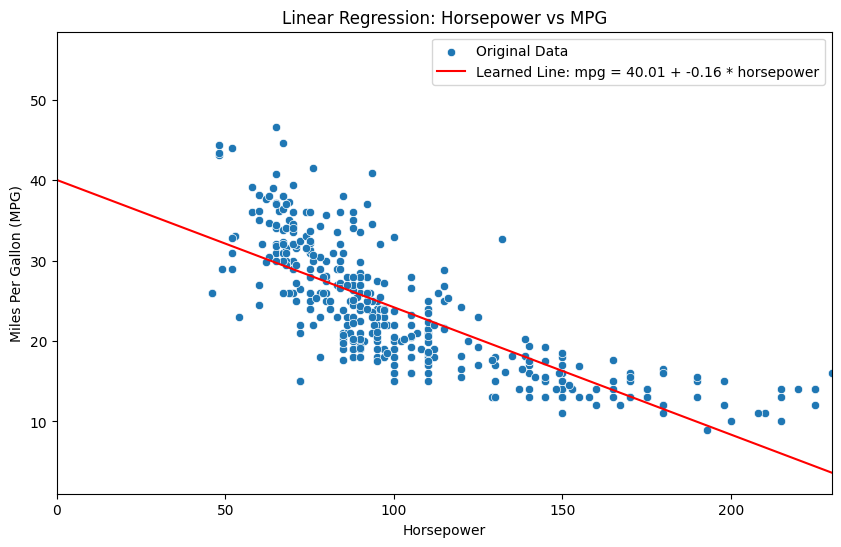

In [41]:
# x0 = 1
df['intercept'] = 1

X = df[['intercept', 'horsepower']].values
y = df['mpg'].values

w = np.linalg.inv(X.T @ X) @ X.T @ y

print(f"Learned Parameters:")
print(f"Intercept (w0): {w[0]}")
print(f"Slope (w1): {w[1]}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df, label='Original Data')

x_values = np.linspace(-100, 230, 100)
plt.plot(x_values, w[0] + w[1] * x_values, color='red', label=f'Learned Line: mpg = {w[0]:.2f} + {w[1]:.2f} * horsepower')

plt.xlim(0, 230)

plt.title('Linear Regression: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend()
plt.show()

In the provided code, X.T is the transpose of the matrix X, and the @ symbol is the matrix multiplication operator. The results show the slope and the interception.

**9. Repeat part 8 but now learn a quadratic function of the form
f = w0 + w1 * x + w2 * x2.**

Learned Parameters:
Intercept (w0): 56.78120816038114
Coefficient for x (w1): -0.4625633791623604
Coefficient for x^2 (w2): 0.0012143177257604948


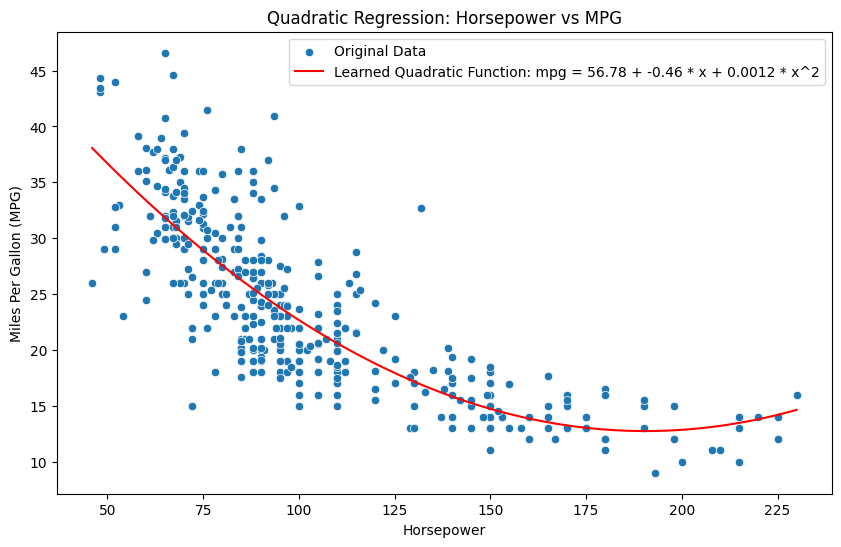

In [42]:
df['intercept'] = 1
# Add columns for x0 (intercept), horsepower, and horsepower^2
df['horsepower_squared'] = df['horsepower'] ** 2

X = df[['intercept', 'horsepower', 'horsepower_squared']].values
y = df['mpg'].values

w = np.linalg.inv(X.T @ X) @ X.T @ y

print(f"Learned Parameters:")
print(f"Intercept (w0): {w[0]}")
print(f"Coefficient for x (w1): {w[1]}")
print(f"Coefficient for x^2 (w2): {w[2]}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df, label='Original Data')

x_values = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
y_values = w[0] + w[1] * x_values + w[2] * x_values**2
plt.plot(x_values, y_values, color='red', label=f'Learned Quadratic Function: mpg = {w[0]:.2f} + {w[1]:.2f} * x + {w[2]:.4f} * x^2')

plt.title('Quadratic Regression: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend()
plt.show()

**10. Repeat part 8 (simple linear regression case) but now by implementing the gradient descent algorithm instead of the closed form solution.**

In [ ]:
df['intercept'] = 1

X = df[['intercept', 'horsepower']].values
y = df['mpg'].values

alpha = 0.0001 # Learning rate
num_iterations = 1000000 # Any less will get non-suitable results, might take some time while running (10 seconds maximum).

w = np.zeros(X.shape[1])

# Gradient Descent
for _ in range(num_iterations):
    f = X @ w # Computing predictions, multiplying by 2 causes overflow so I removed it
    errors = f - y # Computing errors
    g = X.T @ errors / len(y) # Computing gradients
    w -= alpha * g # Updating the parameters

print(f"Learned Parameters (Gradient Descent):")
print(f"Intercept (w0): {w[0]}")
print(f"Slope (w1): {w[1]}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df, label='Original Data')

plt.plot(df['horsepower'], X @ w, color='red', label=f'Learned Line: mpg = {w[0]:.2f} + {w[1]:.2f} * horsepower')

plt.title('Linear Regression (Gradient Descent): Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend()
plt.show()

We can see that the algorithm worked dand got us the same result as in part 8 from these equations:

$$ g_j = \frac{2}{n} \sum_{i}^{n} (f(x_i)-y_1)x_{ij} $$

$$ \hat{w}_j^{(t+1)} = \hat{w}_j^{(t)} - \alpha  g^{(t)}_j $$

Gradient descent is an iterative first-order optimization algorithm used to find a local minimum of a given function. It keeps updating the parameters until finding the minimum (doesn't always find it).